# Nadir Benabdesselam BENN07089309

In [12]:
# exercice 1

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from collections import Counter
from scipy import io
from scipy.spatial import distance
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

#Files
inFich = "../lab2/ex1.data.mat"

#array de données
dataSet = sp.io.loadmat(inFich)

# séparation des données en training et test set
# longueur sépale | largeur sépale | longeur pétale | largeur pétale

# X_train, X_test = train_test_split(dataSet['X'])
# Y_train, Y_test = train_test_split(dataSet['Y'])
X_train, X_test, Y_train, Y_test = train_test_split(dataSet['X'], dataSet['Y'], test_size=0.5)

# pour rendre nos données plus représentatif
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# visualisons les données


# implémentation du KNN
# Ce que je veux faire c'est de calculer pour 1 point de test
# la distance euclidienne entre lui et un point de training
# ensuite sort l'array comparer les resultats de
# la classification et dire elle appartient a quelle classe
# et ajouter cette classe à un array de classe d'entrainement
# donc mon Knn algorithm ressort une liste de classement 




class knn:
    def __init__(self, k):
        # k étant le nombre de voisin à prendre en considération
        self.k = k
        self.arrClass = []
        self.proba = []

    def euclideanDist(self, x1, x2):
        # return la distance euclidienne entre les vecteurs x1 et x2 
        return sp.spatial.distance.euclidean(x1, x2)

    def predict(self, lst):
        # return un dictionnaire avec le nombres de classes
        # des voisins considérées comme Valeur et comme cle
        # la classe  ex :  {'1': 2, '2': 1} (2 instances de 
        # la classe 1 et 1 instance de la classe 2)
        return Counter(lst)
    
    def loadData(self, X_train, Y_train):
        self.X_train = X_train
        self.Y_train = Y_train
        

    def classification(self, x1):
        
        # remise a zero des listes et dict
        sorted_dist_class, dist_class, arrClass, pair = [],[],[],[0,0]
        dict_class = {}

        
        # calcul de la distance euclidienne et association de sa classe test i 
        for j in range(len(self.X_train)):
            pair[0] = self.euclideanDist(self.X_train[j],x1)
            pair[1] = np.asscalar(self.Y_train[j])
            dist_class.append([pair[x] for x in range(len(pair))])

        # tri des distances 
        sorted_dist_class = sorted(dist_class)
        sorted_dist_class = sorted_dist_class[0:self.k]
        dict_class = self.predict([sorted_dist_class[x][1] for x in range(self.k)]) 
        self.arrClass.append(max(dict_class,key=dict_class.get))
        
        # calcul des probabilités 
        # nombre des voisins considéré pour la classe / le nombre total 
        
        self.proba.append(max(dict_class.values())/self.k)
        

    

knn_1 = knn(1)
knn_2 = knn(2)
knn_3 = knn(3)
knn_4 = knn(4)
knn_5 = knn(5)
knn_6 = knn(6)
knn_7 = knn(7)
knn_8 = knn(8)
knn_9 = knn(9)
knn_10 = knn(10)

knn_1.loadData(X_train, Y_train)
knn_2.loadData(X_train, Y_train)
knn_3.loadData(X_train, Y_train)
knn_4.loadData(X_train, Y_train)
knn_5.loadData(X_train, Y_train)
knn_6.loadData(X_train, Y_train)
knn_7.loadData(X_train, Y_train)
knn_8.loadData(X_train, Y_train)
knn_9.loadData(X_train, Y_train)
knn_10.loadData(X_train, Y_train)

l = [knn_1, knn_2, knn_3, knn_4, knn_5, knn_6, knn_7, knn_8, knn_9, knn_10]


for i in l:
    for j in range(len(X_test)):
        i.classification(X_test[j])

# comparaison des resultats de classification vs les resultats reel

cnt = 0
i=0
for k in l:
    i+=1
    for m in range(len(Y_test)):
        if(k.arrClass[m] == Y_test[m]):
#             print(k.arrClass[m] ,"==", Y_test[m])
            cnt+=1
    print("K = ",i ,"accuracy = ", cnt/len(Y_test))
    cnt = 0

# Q5 
# En entrainant l'algorithme knn j'ai remarqué que les résultats étaient très bon.
# En effet, en entrainant sur des données aléatoire comme ci-haut, nous arrivons
# à classifier correctement les éléments de notre série de test à un taux de 90 % et plus,
# dans les meilleurs cas. Pour obtenir de meilleurs résultats il faudrait 
# normaliser les données d'entrainement. un moyen
# efficace serait d'utiliser la méthode MinMaxScaler de sklearn pour rendre nos données
# d'entrainement et de test plus représentatif.
# Pour conclure, le k = 9 semble être le meilleur nombre de voisin à  considérer pour les 
# données fournies.


    




















K =  1 accuracy =  0.9333333333333333
K =  2 accuracy =  0.9333333333333333
K =  3 accuracy =  0.9466666666666667
K =  4 accuracy =  0.9466666666666667
K =  5 accuracy =  0.96
K =  6 accuracy =  0.9466666666666667
K =  7 accuracy =  0.9466666666666667
K =  8 accuracy =  0.9466666666666667
K =  9 accuracy =  0.96
K =  10 accuracy =  0.9466666666666667


Taux de classification des donnees de test : 92.0 %
---- Validation croisee (10 folds) sur les donnees d'entrainement ----
score moyen = 0.92 deviation standard = 0.0912



---- Calcul du score moyen et std pour differentes valeurs de C ----
C =  0.01 score moyen = 0.75 deviation standard = 0.0224
C =  0.1 score moyen = 0.86 deviation standard = 0.0822
C =  1 score moyen = 0.92 deviation standard = 0.0912
C =  10 score moyen = 0.97 deviation standard = 0.0500
C =  100 score moyen = 0.96 deviation standard = 0.0573
C =  1000 score moyen = 0.90 deviation standard = 0.0872
C =  10000 score moyen = 0.90 deviation standard = 0.0880
C =  100000 score moyen = 0.92 deviation standard = 0.0912


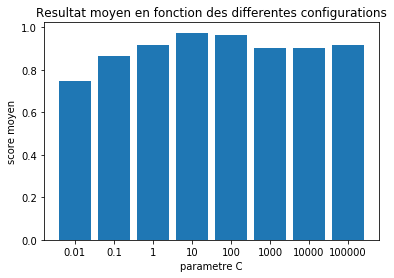

la meilleure configuration semble etre C = 10
Taux de classification des donnees de test : 94.66666666666667 %
taux d'erreur avec C optimal : 5.333333333333334 % Vs C non optimisé : 7.9999999999999964 %


In [2]:
# exercice 2

from sklearn import svm, linear_model
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
%matplotlib inline



# input File
inFich = "../lab2/ex1.data.mat"

#array de données
dataSet = sp.io.loadmat(inFich)


# séparation des données en training et test set
# longueur sépale | largeur sépale | longeur pétale | largeur pétale
X_train, X_test, Y_train, Y_test = train_test_split(dataSet['X'], dataSet['Y'], test_size=0.5)

X = np.append(X_train,Y_train,axis=1)


# cross_validation k=10 folds
clf = svm.LinearSVC().fit(X_train,Y_train.ravel())
# taux de classification des donnees de test
scoreNonOpt = clf.score(X_test,Y_test)
print("Taux de classification des donnees de test :", clf.score(X_test,Y_test)*100, "%")
scores = cross_val_score(clf, X_train, Y_train.ravel(), cv=10)
print("---- Validation croisee (10 folds) sur les donnees d'entrainement ----")
print("score moyen = ""%.2f" % scores.mean(),"deviation standard = ""%.4f" % scores.std())
print("\n\n")
print("---- Calcul du score moyen et std pour differentes valeurs de C ----")

lastScore = 0

Clst = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
x, y = [0,1,2,3,4,5,6,7],[]
labels = ["0.01", "0.1", "1", "10", "100", "1000", "10000", "100000"]
# SVM
for C in Clst :
    clf = svm.LinearSVC(C=C).fit(X_train, Y_train.ravel())
    scores = cross_val_score(clf, X_train, Y_train.ravel(), cv=10)
    y.append(scores.mean())
    print("C = ",C, "score moyen = ""%.2f" %scores.mean(),"deviation standard = ""%.4f" % scores.std())
    # choix du meilleur C
    if lastScore < scores.mean():
        lastScore = scores.mean()
        bestC = C

        
    

plt.bar(x,y)
plt.xticks(x,labels)
plt.title("Resultat moyen en fonction des differentes configurations")
plt.xlabel("parametre C")
plt.ylabel("score moyen")
plt.show()


print("la meilleure configuration semble etre C =",bestC )
clf = svm.LinearSVC(C=bestC).fit(X_train,Y_train.ravel())
# taux de classification des donnees de test
print("Taux de classification des donnees de test :", clf.score(X_test,Y_test)*100, "%")
print("taux d'erreur avec C optimal :", (1-clf.score(X_test,Y_test))*100,"%","Vs C non optimisé :", (1-scoreNonOpt)*100,"%" )

# 10 les meilleurs résultats obtenues sont avec les C équivalent à 1 et 10, avec les moins bonnent
# valeurs étant les C équivalent à 0,01 et 0,1.

---- Calcul du score moyen et std pour differentes valeurs de C ----


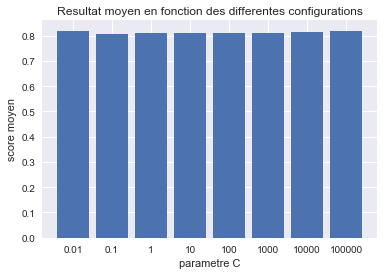

la meilleure configuration semble etre C = 0.01
Taux d'erreur de classification des donnees de test : 17.100000000000005 %
le nombre de vecteur de support est :  114


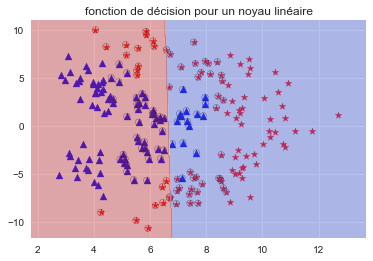

--- choix du meilleur C et gamma ---
meilleur C =  1000 meilleur Gamma =  0.001
Taux d'erreur de classification des donnees de test : 3.949999999999998 %
le nombre de vecteur de support est :  22


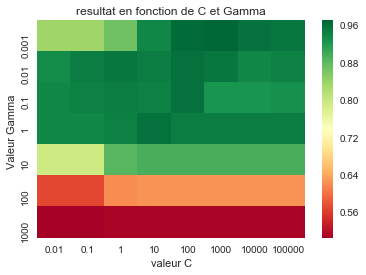

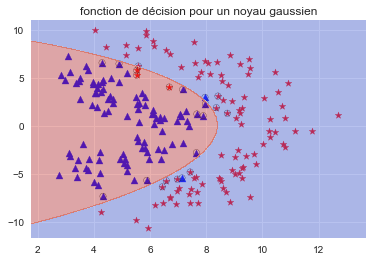

In [3]:
# exercice 3
import seaborn as sns; sns.set()
from sklearn import svm, linear_model
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
%matplotlib inline



def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# input File
inFich = "../lab2/ex3.data.mat"

#array de données
dataSet = sp.io.loadmat(inFich)


print("---- Calcul du score moyen et std pour differentes valeurs de C ----")

lastScore = 0

Clst = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
x, y = [0,1,2,3,4,5,6,7],[]
labels = ["0.01", "0.1", "1", "10", "100", "1000", "10000", "100000"]
# SVM
for C in Clst :
    clf = svm.SVC(kernel='linear',C=C).fit(dataSet['X'], dataSet['Y'].ravel())
    scores = cross_val_score(clf, dataSet['X'], dataSet['Y'].ravel(), cv=10)
    y.append(scores.mean())
#     print("C = ",C, "score moyen = ""%.2f" %scores.mean(),"deviation standard = ""%.4f" % scores.std())
    # choix du meilleur C
    if lastScore < scores.mean():
        lastScore = scores.mean()
        bestC = C


plt.bar(x,y)
plt.xticks(x,labels)
plt.title("Resultat moyen en fonction des differentes configurations")
plt.xlabel("parametre C")
plt.ylabel("score moyen")
plt.show()



print("la meilleure configuration semble etre C =",bestC )
clf = svm.SVC(kernel='linear',C=bestC).fit(dataSet['X'],dataSet['Y'].ravel())
# taux de classification des donnees de test
print("Taux d'erreur de classification des donnees de test :", (1 - clf.score(dataSet['XTEST'],dataSet['YTEST']))*100, "%")
print("le nombre de vecteur de support est : ",np.sum(clf.n_support_))

# 5 calcul de la borne superieur de l'erreur 
# 6 affichage des vecteur de supp par dessus les donnees
fig, ax = plt.subplots()

cnt=0
for lines in dataSet['Y']:
    if lines[0] == 1:
        m='*'
        c='r'
    elif lines[0] == 2:
        m='^'
        c='b'
    plt.scatter(dataSet['X'][cnt,0],dataSet['X'][cnt,1],c=c,marker=m)    
    cnt+=1



X0, X1 = dataSet['X'][:, 0], dataSet['X'][:, 1]
plt.scatter([(i[0]) for i in clf.support_vectors_], [(i[1]) for i in clf.support_vectors_], s=40, facecolors='none', edgecolors='k')
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.4)
plt.title("fonction de décision pour un noyau linéaire")

plt.show()

# 7 affichage de la fonction de décision



# 9 SVM avec Noyau gaussien 
lastStd = 999
lastScore = 0
# Il est suggéré par scikit qu'une logarithmic grid from 10^-3 to 10^3 est une bonne plage de valeur pour gamma
glst = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
Clst = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
x, y = [0,1,2,3,4,5,6,7],[0,1,2,3,4,5,6,7]
labelsX = ["0.01", "0.1", "1", "10", "100", "1000", "10000", "100000"]
labelsY = ["0.001", "0.01", "0.1", "1", "10", "100", "1000"]
classifiers = []
subclass = [0,1,2,3,4,5,6,7]

# SVM
print("--- choix du meilleur C et gamma ---")
for g in glst:
#     print("Gamma = ", g)
    i = 0  
    for C in Clst :
        clf = svm.SVC(kernel='rbf',C=C,gamma=g).fit(dataSet['X'], dataSet['Y'].ravel())
        scores = cross_val_score(clf, dataSet['X'], dataSet['Y'].ravel(), cv=10)
#         print("C = ",C, "score moyen = ""%.2f" %scores.mean(),"deviation standard = ""%.4f" % scores.std())
        # choix du meilleur C
#         classifiers.append(scores.mean())
        subclass[i] = scores.mean()
        i+=1
        if lastScore <= scores.mean() and lastStd >= scores.std() :
            lastScore = scores.mean()
            bestC = C
            bestG = g
#             classifiers.append((C, g, clf))
#     print(bestC, bestG)   
    classifiers.append([subclass[x] for x in range(len(subclass))])

ax = sns.heatmap(classifiers,cmap='RdYlGn', xticklabels=Clst, yticklabels=glst)
ax.set_title('resultat en fonction de C et Gamma')
ax.set_xlabel('valeur C')
ax.set_ylabel('Valeur Gamma ')

print("meilleur C = ", bestC, "meilleur Gamma = ", bestG)
clf = svm.SVC(kernel='rbf',C=bestC,gamma=bestG).fit(dataSet['X'],dataSet['Y'].ravel())
# taux de classification des donnees de test
print("Taux d'erreur de classification des donnees de test :", (1 - clf.score(dataSet['XTEST'],dataSet['YTEST']))*100, "%")
print("le nombre de vecteur de support est : ", np.sum(clf.n_support_))    

# 9 calcul de la borne superieur de l'erreur 
# 10 affichage des vecteur de supp par dessus les donnees
# 11 affichage de la fonction de décision par dessus les donnees 
fig, ax = plt.subplots()

cnt=0
for lines in dataSet['Y']:
    if lines[0] == 1:
        m='*'
        c='r'
    elif lines[0] == 2:
        m='^'
        c='b'
    plt.scatter(dataSet['X'][cnt,0],dataSet['X'][cnt,1],c=c,marker=m)    
    cnt+=1

X0, X1 = dataSet['X'][:, 0], dataSet['X'][:, 1]
plt.scatter([(i[0]) for i in clf.support_vectors_], [(i[1]) for i in clf.support_vectors_], s=40, facecolors='none', edgecolors='k')
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.4)
plt.title("fonction de décision pour un noyau gaussien")
plt.show()


# 12 Que constatez-vous en comparant les deux résultats finaux? Commentez.
# je constate que le score pour le noyau gaussien est plus elever que le score
# du noyau lineaire. On peut constater que l'erreur de classification diminue
# de 17 % en moyenne selon mes tests a 3 % (ratio d'environ 5)

# 13 Que constatez-vous en comparant le nombre de vecteurs de support? Commentez.
# je constate que le nombre de vecteurs de support est plus petit avec le noyau gaussien
# que dans le noyau lineaire cela est du au fait qu'il y a moins de chance qu'un point soit 
# mal positionné 

In [4]:
# exercice 4    

# determiner quel est le meilleur algorithme pour trier les types de verres afin d'effectuer le recyclage des verres
# cross validation des donnee de test
# division par 10 les donnees et les attribuer aleatoirement
# 1/10 = baseTest (shuffle at each iteration)
# 9/10 = baseTrain (shuffle at each iteration) 
# optimisation des parametres pour le svm avec Noyau gaussien
# optimisation du k pour le knn
# seconde validation croisee lors de loptimisation des parametres 
# au final on se retrouve avec 10 mesures de performance de score pour chaque baseTest
# faire la moyenne pour obtenir la performance finale 


# pseudo-code


# for train_index and test_index data in data set do :
#     X_train, X_test <- dataSet[train_index], dataSet[test_index]
#     Y_train, Y_test <- dataSet[train_index], dataSet[test_index]
#     for each gamma in gamma list do:
#         for each C parameters in C list do:
#             create a SVM with gamma and C parameters
#             scores <- cross_validate the SVM 8 times 
#             if svmLastScore <= scores.mean() and svmLastStd >= scores.std() :
#                 best C <- C 
#                 best gamma <-Gamma 
#                 last score <- Current Score
    
#     for each K in n_neigh list do:
#         create a KNN with parameter K of n_neigh
#         scores <- cross_validate the SVM 8 times
#         if current score is better than last score do:
#             k -> best K
#             last score <- Current Score
    
#     create a SVM with Best gamma value and best C value 
#     fit the Train data
#     predict the score with the Test data
#     append the score in a list of SVM best values
#     do the same with KNN 
    
# then sum all the best values of KNN and SVM list of best values and print the result


import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
import random
from scipy import io
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
%matplotlib inline

#chargement des donnees 
# input File
inFich = "../lab2/Ex4.data.mat"

#array de données
dataSet = sp.io.loadmat(inFich)
#split des parametres
skf = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=46)

# optimisation des parametres 

# Il est suggéré par scikit qu'une logarithmic grid from 10^-3 to 10^3 est une bonne plage de valeur pour gamma
glst = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
Clst = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
n_neigh = [1,2,3,4,5,6,7] 
bestSVMScore = []
bestKNNScore = []
kLastScore = 0
kLastStd = 999
svmLastScore = 0
svmLastStd = 999


# for x in range(10):
#     X_train, X_test, Y_train, Y_test = train_test_split(dataSet['X'], dataSet['Y'], test_size=0.1,stratify = dataSet['Y'],)
    
dataSet['Y'] = dataSet['Y'].reshape(dataSet['Y'].shape[0])

print("--- recherche exhaustive du meilleur C, gamma et k  ---")
for train_index, test_index in skf.split(dataSet['X'],dataSet['Y']):
    # separation des donnee randomly 10% - 90%
    X_train, X_test = dataSet['X'][train_index], dataSet['X'][test_index]
    Y_train, Y_test = dataSet['Y'][train_index], dataSet['Y'][test_index]
    for g in glst:
        for C in Clst :
            clf = svm.SVC(kernel='rbf',C=C,gamma=g)
            scores = cross_val_score(clf, X_train, Y_train, cv=8)
    #         print("C = ",C, "score moyen = ""%.2f" %scores.mean(),"deviation standard = ""%.4f" % scores.std())
            # choix du meilleur C et gamma
            if svmLastScore <= scores.mean() and svmLastStd >= scores.std() :
                lastScore = scores.mean()
                bestC = C
                bestG = g

    for n in n_neigh:
        neigh = KNeighborsClassifier(n_neighbors=n)
        scores = cross_val_score(neigh, X_train, Y_train,cv=8)
        if kLastScore <= scores.mean() and kLastStd >= scores.std() :
            kLastScore = scores.mean()
            kLastStd = scores.std()
            bestK = n
    
    #
    clf = svm.SVC(kernel='rbf',C=bestC,gamma=bestG).fit(X_train, Y_train)
    bestSVMScore.append(clf.score(X_test, Y_test))
    neigh = KNeighborsClassifier(n_neighbors=bestK).fit(X_train, Y_train)
    bestKNNScore.append(neigh.score(X_test, Y_test))
    



print("--- performance finale ---")
print("SVM : ", sum(bestSVMScore)/len(bestSVMScore))
print("KNN : ", sum(bestKNNScore)/len(bestKNNScore))


# Quel classificateur choisiriez-vous pour cette tâche? 
# Clairement le KNN est meilleur pour cette tache, car il a un meilleur score que le SVM
# Quelles sont les résultats que vous avez utilisés pour faire votre choix. 
# en faisant plusieurs tests avec différents données de test pour l'entrainement à 
# chaque itérations, nous arrivons à un score de 72 % pour le KNN et de 38% pour le SVM
# Outre le taux d’erreur, qu’est-ce qui pourrait motiver votre choix?
# Le fait que le KNN fonctionne bien avec beaucoup de points de données à petite dimension (2D)
# comme dans notre cas

--- recherche exhaustive du meilleur C, gamma et k  ---
--- performance finale ---
SVM :  0.3818181818181819
KNN :  0.7227272727272727


--- recherche exhaustive des meilleurs paramètres  ---
Classifieur SVM avec Noyau linéaire : 
paramètre C:  0.1
taux d'erreur sur la base de test :  0.2300000000000001
Classifieur SVM avec Noyau Polynomial :
paramètre C et degré :  100000 6
taux d'erreur sur la base de test :  0.08800000000000008
Classifieur SVM avec Noyau Gaussien : 
paramètre C et gamma :  100000 1000
taux d'erreur sur la base de test :  0.10099999999999998
classifieur KNN
paramètre K :  6
taux d'erreur sur la base de test :  0.10099999999999998
classifieur MLP
paramètre momentum :  1
taux d'erreur sur la base de test :  0.2300000000000001


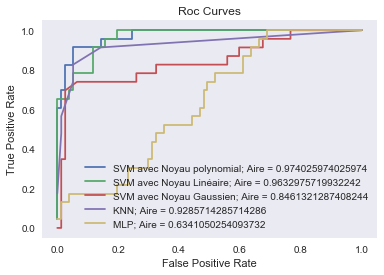

In [5]:
# exercice 5

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math
import random
from scipy import io
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from numpy import trapz 
%matplotlib inline

#chargement des donnees 
# input File
inFich = "../lab2/Ex5.data.mat"

#array de données
dataSet = sp.io.loadmat(inFich)
# pprint(dataSet)
#split des parametres
skf = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=46)

# optimisation des parametres 


# Il est suggéré par scikit qu'une logarithmic grid from 10^-3 to 10^3 est une bonne plage de valeur pour gamma
glst = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
Clst = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
polyT = [1,2,3,4,5,6,7]
n_neigh = [1,2,3,4,5,6,7] 
# Il est suggéré par scikit qu'un momentum devrait se situer entre 0 et 1 
momentum = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
n_iter = [300,400,500,600,700,800,900,1000]

bestSVMScore = []
bestLinScore = []
bestPolyScore = []
bestKNNScore = []
bestMLPScore = []
area,handles = [],[]

kLastScore = 0
kLastStd = 999
svmLastScore = 0
svmLastStd = 999
polyLastScore = 0
polyLastStd = 999
linLastScore = 0
linLastStd = 999
mlpLastScore = 0
mlpLastStd = 999


# a implementer : recherche du meilleur C pour le noyau lineaire et entrainement dun MLP simple couche 
print("--- recherche exhaustive des meilleurs paramètres  ---")
for train_index, test_index in skf.split(dataSet['X'],dataSet['Y']):
    # separation des donnee randomly 10% - 90%
    X_train, X_test = dataSet['X'][train_index], dataSet['X'][test_index]
    Y_train, Y_test = dataSet['Y'][train_index], dataSet['Y'][test_index]
    
    # entrainement 
    for c in Clst :
        clf = svm.SVC(kernel='linear',C=c).fit(X_train, Y_train.ravel())
        scores = cross_val_score(clf, X_train, Y_train.ravel(), cv=8)
        if linLastScore <= scores.mean() and linLastStd >= scores.std() :
            linLastScore = scores.mean()
            linLastStd = scores.std()
            best = c
            
    for g in glst:
        for C in Clst :
            clf = svm.SVC(kernel='rbf',C=C,gamma=g).fit(X_train, Y_train.ravel())
            scores = cross_val_score(clf, X_train, Y_train.ravel(), cv=8)
            # choix du meilleur C et gamma
            if svmLastScore <= scores.mean() and svmLastStd >= scores.std() :
                svmlastScore = scores.mean()
                svmLastStd = scores.mean()
                bestC = C
                bestG = g
                
    for t in polyT:
        for C in Clst:
            clf = svm.SVC(kernel='poly',C=C,degree=t).fit(X_train, Y_train.ravel())
            scores = cross_val_score(clf,X_train,Y_train.ravel(),cv = 8)
            if polyLastScore <= scores.mean() and polyLastStd >= scores.std() :
                polyLastScore = scores.mean()
                polyLastStd = scores.std()
                bestcT = c
                bestT = t

    for n in n_neigh:
        neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, Y_train.ravel())
        scores = cross_val_score(neigh, X_train, Y_train.ravel(),cv=8)
        if kLastScore <= scores.mean() and kLastStd >= scores.std():
            kLastScore = scores.mean()
            kLastStd = scores.std()
            bestK = n
            
    for m in momentum :
        clf = MLPClassifier(activation = 'logistic', hidden_layer_sizes = (7,), learning_rate = 'constant', 
                            learning_rate_init = .001, solver = 'sgd', momentum=m )
        scores = cross_val_score(neigh, X_train, Y_train.ravel(),cv=8)
        if mlpLastScore <= scores.mean() and mlpLastStd >= scores.std():
            mlpLastScore = scores.mean()
            mlpLastStd = scores.std()
            bestM = m
            bestn = n

    # score sur la base de test 
    clf = svm.SVC(kernel='linear',C=best).fit(X_train, Y_train.ravel())
    bestLinScore.append(clf.score(dataSet['Xtest'], dataSet['Ytest'].ravel()))
    
    clf = svm.SVC(kernel='poly',C=bestC,degree=bestT).fit(X_train, Y_train.ravel())
    bestPolyScore.append(clf.score(dataSet['Xtest'], dataSet['Ytest'].ravel()))
    
    clf = svm.SVC(kernel='rbf',C=bestC,gamma=bestG).fit(X_train, Y_train.ravel())
    bestSVMScore.append(clf.score(dataSet['Xtest'], dataSet['Ytest'].ravel()))
    
    neigh = KNeighborsClassifier(n_neighbors=bestK).fit(X_train, Y_train.ravel())
    bestKNNScore.append(neigh.score(dataSet['Xtest'], dataSet['Ytest'].ravel()))
    
    # maybe utiliser le max_it (nombre d'epoch)
    clf = MLPClassifier(activation = 'logistic', hidden_layer_sizes= (7,), learning_rate = 'constant', learning_rate_init = .001,
                        solver = 'sgd',momentum=bestM)
    clf.fit(X_train,Y_train.ravel())
    bestMLPScore.append(clf.score(dataSet['Xtest'], dataSet['Ytest'].ravel()))
    

y_score_svmL = svm.SVC(kernel='linear',C=best).fit(X_train, Y_train.ravel()).decision_function(dataSet['Xtest'])
y_score_svmP = svm.SVC(kernel='poly',C=bestC,degree=bestT).fit(X_train, Y_train.ravel()).decision_function(dataSet['Xtest'])
y_score_svmG = svm.SVC(kernel='rbf',C=bestC,gamma=bestG).fit(X_train, Y_train.ravel()).decision_function(dataSet['Xtest'])
y_score_KNN = KNeighborsClassifier(n_neighbors=bestK).fit(X_train, Y_train.ravel()).predict_proba(dataSet['Xtest'])
y_score_MLP = MLPClassifier(activation = 'logistic', hidden_layer_sizes= (7,), learning_rate = 'constant', learning_rate_init = .001,
                        solver = 'sgd',momentum=bestM).fit(X_train,Y_train.ravel()).predict_proba(dataSet['Xtest'])

    

print("Classifieur SVM avec Noyau linéaire : ")    
print("paramètre C: ", best)
print("taux d'erreur sur la base de test : ", 1 - sum(bestLinScore)/10)

print("Classifieur SVM avec Noyau Polynomial :")
print("paramètre C et degré : ",bestcT, bestT)
print("taux d'erreur sur la base de test : ", 1 - sum(bestPolyScore )/10)

print("Classifieur SVM avec Noyau Gaussien : ")
print("paramètre C et gamma : ",bestC, bestG)
print("taux d'erreur sur la base de test : ", 1 - sum(bestKNNScore)/10)

print("classifieur KNN")
print("paramètre K : ",bestK )
print("taux d'erreur sur la base de test : ", 1 - sum(bestKNNScore)/10)

print("classifieur MLP")
print("paramètre momentum : ", bestM)
print("taux d'erreur sur la base de test : ", 1 - sum(bestMLPScore)/10)

fpr, tpr, thresholds = metrics.roc_curve(dataSet['Ytest'], np.asarray(y_score_svmP), pos_label=1)
fpr2, tpr2, thresholds = metrics.roc_curve(dataSet['Ytest'], np.asarray(y_score_svmL), pos_label=1)
fpr3, tpr3, thresholds = metrics.roc_curve(dataSet['Ytest'], np.asarray(y_score_svmG), pos_label=1)
fpr4, tpr4, thresholds = metrics.roc_curve(dataSet['Ytest'], np.asarray(y_score_KNN)[:,1])
fpr5, tpr5, thresholds = metrics.roc_curve(dataSet['Ytest'], np.asarray(y_score_MLP)[:,1])


'''Calcul des Aires sous la courbe'''
area.append(str(abs(np.trapz(tpr,fpr))))
area.append(str(abs(np.trapz(tpr2,fpr2))))
area.append(str(abs(np.trapz(tpr3,fpr3))))
area.append(str(abs(np.trapz(tpr4,fpr4))))
area.append(str(abs(np.trapz(tpr5,fpr5))))


handles.append("Noyau polynomial; Aire = "+ area[0])
handles.append("Noyau Linéaire; Aire = "+ area[1] )
handles.append("Noyau Gaussien; Aire = "+ area[2] )
handles.append("KNN; Aire = "+ area[3])
handles.append("MLP; Aire = "+ area[4])


plt.plot(fpr, tpr)
plt.plot(fpr2, tpr2)
plt.plot(fpr3, tpr3)
plt.plot(fpr4, tpr4)
plt.plot(fpr5, tpr5)

plt.title('Roc Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(handles)
plt.show()



# À votre avis est-ce que dans ce type de problème, un faux positif a le même impact qu’un faux négatif? 
# Devraient-ils être comptés de la même manière? Expliquez. 

# un faux positif c'est lorsque nous recevons un diagnostic positif, alors que nous aurions dû recevoir un diagnostic
# négatif, un faux négatif c'est le contraire, dans le cas de détection de la bactérie cela reviendrait à dire qu'une
# personne à la bactérie mais qu'elle ne l'a pas en réalité ou qu'une personne n'a pas la bactérie, mais qu'on prédit qu'elle
# l'a. À mon avis dans les deux cas les problèmes sont différents et ils ne devraient pas être compté de la même manière. 


# Tracez les courbes ROC pour chacun des classificateurs sur un même graphique. Choisissez le meilleur classificateur. 
# Comment avez-vous choisi ce classificateur. Quelle proportion de bactéries vlimeuses détecterait chacun des classificateurs 

# en séparant mes données d'entrainement en 10 en faisant une validation croisée avec tous mes classificateurs jai chercher
# les meilleurs paramètres à utiliser avec mes données. Au final, les taux d'erreur sur la base de test sont afficher ci-dessous
# et je choisirais le SVM avec Noyau polynomial pour faire la detection de la bacterie vlimeuse.

# si on acceptait 10% fausses détections. Choisiriezvous le même classificateur? 

# Comme nous avons un taux d'erreur assez proche pour 3 autres classificateurs et en se fiant sur la courbe du ROC,
# je ne crois pas que je devrais changer de classificateur.

# Choisiriez-vous le même seuil de décision? 
# je ne choisirai cepandant pas le même seuil de décision, car mes courbes de fausses détection changerait un peu plus et 
# modifierai du coup le seuil de décision.

In [75]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

#Code pour le telechargement des donnees de CIFAR10
#Creer un transform qui transform numpy array (image) aux pytorch tensor
trainTransform = transforms.Compose([transforms.Resize((64,64),interpolation=2), transforms.ToTensor()])
#transforms.Resize((512,512),interpolation=2),

#Telecharger et creer un dataset pour CIFAR10 entrainement en appliquant le transform
trainset_cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=trainTransform)

#Creer un loader pour les donnees d'entrainement
trainloader_cifar = torch.utils.data.DataLoader(trainset_cifar, batch_size=128, shuffle=True, num_workers=2)

#Telecharger et creer un dataset pour CIFAR10 test en appliquant le transform
testset_cifar = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=trainTransform)

#Creer un loader pour les donnees de test                                   
testloader_cifar = torch.utils.data.DataLoader(testset_cifar, batch_size=100, shuffle=False, num_workers=2)






Files already downloaded and verified
Files already downloaded and verified


plane   car  bird   cat  deer   dog  frog horse  ship truck


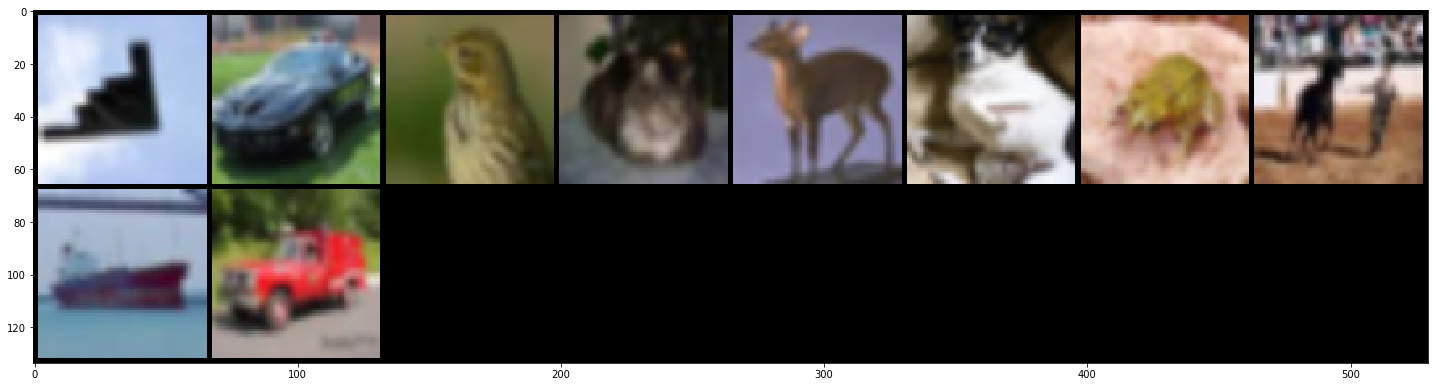

In [124]:
# Affichage de 10 images de la base de donnée
#Bloc affichant les 10 images
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


labelUnitaire = [x for x in range(10)]
labelFound = []
pos = 0
columns = 5
rows = 10


plt.figure(figsize=(5*columns ,3*rows))
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader_cifar)
images, labels = dataiter.next()



# recherche des positions de 10 labels unitaire 
for i in labelUnitaire:
    pos=0
    for j in labels:
        if i == j:
            labelFound.append(pos)
            break 
        pos+=1
            
test = []
# show images
for i in labelFound:
    test.append(images[:][:][i])    

imshow(torchvision.utils.make_grid(test[:][:][:]))



print(' '.join('%5s' % classes[labels[j]] for j in labelFound))


In [76]:
# Definition un reseau convolutionel
import torch.nn as nn
import torch.nn.functional as F

class MonNet(nn.Module):
    def __init__(self, flag):
        super(MonNet, self).__init__()
        #         (3,6,16,32,64) avec 1152 ou (3,18,36,64) avec 2304
        self.flag = flag
        # les if sont la pour automatiser les tracer d'image plus tard
        if self.flag == 1:
            self.conv1 = nn.Conv2d(3, 6, kernel_size=3) #Couche de convolution avec 1 entree et 6 
            self.conv2 = nn.Conv2d(6, 16, kernel_size=3) #Couche de convolution avec 6 entrees et 16 
            self.conv3 = nn.Conv2d(16, 32, kernel_size=3)
            self.conv4 = nn.Conv2d(32, 64, kernel_size=3)
            
        elif self.flag == 2 :
            self.conv1 = nn.Conv2d(3, 18, kernel_size=3) #Couche de convolution avec 1 entree et 6 
            self.conv2 = nn.Conv2d(18, 36, kernel_size=3) #Couche de convolution avec 6 entrees et 16 
            self.conv3 = nn.Conv2d(36, 64, kernel_size=3)
        
        elif self.flag == 3:
            self.conv1 = nn.Conv2d(3, 36, kernel_size=3) #Couche de convolution avec 1 entree et 6 
            self.conv2 = nn.Conv2d(36, 64, kernel_size=3) #Couche de convolution avec 6 entrees et 16 

        self.conv2_drop = nn.Dropout2d() #Couche dropout c.f le cours

        if self.flag == 1 :
            self.fc1 = nn.Linear(1152, 128) #Couche de MLP avec 1152 en entrees et 128 en sortie
        elif self.flag == 2 :
            self.fc1 = nn.Linear(2304, 128) #Couche de MLP avec 2304 en entrees et 128 en sortie
        elif self.flag == 3 :
            self.fc1 = nn.Linear(12544, 128) #Couche de MLP avec 12544 en entrees et 128 en sortie

        self.fc2 = nn.Linear(128, 84) #Couche de MLP avec 128 en entrees et 84 en sortie
        self.fc3 = nn.Linear(84, 10) # couche MLP avec 84 entrées et 10 sorties (10 classes)
    def forward(self, x):
        out = F.relu(F.max_pool2d(self.conv1(x), 2))
        out = F.relu(F.max_pool2d(self.conv2(out), 2))
        if self.flag == 2 or flag == 1:
            out = F.relu(F.max_pool2d(self.conv3(out), 2))
        elif self.flag == 1:
            out = F.relu(F.max_pool2d(self.conv4(out), 2))

        out = out.view(out.size(0), -1) # pour eviter d'avoir l'erreur type mismatch 
        #out = out.view(128, 128)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = F.dropout(out, training=self.training)
        out = self.fc3(out)
        return F.log_softmax(out, dim=1)

In [77]:
#Entrainement
def trainModel(model, cuda, optimizer, trainloader_cifar, epoch):
    model.train() # Mettre le model en mode entrainement
    for batch_idx, (data, target) in enumerate(trainloader_cifar): # Parcourir le dataset de CIFAR10 
        data, target = data.to(cpu), target.to(cpu) # Mettre les donnees et la reponse desiree sur le cpu
        optimizer.zero_grad() # Initialize l'optimizeur
        output = model(data) # Le forward pass sur un batch d'image
        loss = F.nll_loss(output, target) # Le calcul du loss en utilisant la reponse desiree et la reponse obtenue
        loss.backward() # La retropropagation
        optimizer.step() # Optimization


In [78]:
#Test le model
lstAcc3Conv, lstAcc4Conv, lstAcc2Conv = [],[],[]
lstLoss3Conv, lstLoss4Conv, lstLoss2Conv = [],[],[]
def test(model, cpu, testloader_cifar, lstAcc3Conv, lstAcc4Conv, lstAcc2Conv, lstLoss3Conv, lstLoss4Conv, lstLoss2Conv, flag):
    model.eval() # Mettre le model en model evaluation (mode test)
    test_loss = 0
    correct = 0
    with torch.no_grad(): # Pas de gradient pour notre model vu qu'on est en evaluation
        for data, target in testloader_cifar:
            data, target = data.to(cpu), target.to(cpu)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # La somme des losses
            pred = output.max(1, keepdim=True)[1] # Obtenir la reponse predite
            correct += pred.eq(target.view_as(pred)).sum().item() # Augmenter le nombre de correct
            
        test_loss /= len(testloader_cifar.dataset)
        
        if flag == 1: 
            lstAcc4Conv.append(100. * correct / len(testloader_cifar.dataset))
            lstLoss4Conv.append(test_loss)
            
        elif  flag == 2:
            lstAcc3Conv.append(100. * correct / len(testloader_cifar.dataset))
            lstLoss3Conv.append(test_loss)
            
        elif flag == 3:
            lstAcc2Conv.append(100. * correct / len(testloader_cifar.dataset))
            lstLoss2Conv.append(test_loss)
            
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(testloader_cifar.dataset),
            100. * correct / len(testloader_cifar.dataset)))

In [79]:
num_of_epochs = 10 #Le nombre d'epoch d'entrainement
flag = 0
for flag in range(3):
    flag += 1
    print("we are doing flag = ", flag)
    
    #Initialization du model et mettre le model sur CPU
    cpu = torch.device('cpu')
    model = MonNet(flag).to(cpu)
    
    #Creation de l'optimiseur SGD avec 0.01 de coefficient apprentisage
    optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
    for epoch in range(num_of_epochs):
        trainModel(model, cpu, optimizer, trainloader_cifar, epoch)
        test(model, cpu, testloader_cifar, lstAcc3Conv, lstAcc4Conv, lstAcc2Conv, lstLoss3Conv, lstLoss4Conv, lstLoss2Conv, flag )

we are doing flag =  1

Test set: Average loss: 2.1157, Accuracy: 2418/10000 (24%)


Test set: Average loss: 1.7722, Accuracy: 3523/10000 (35%)


Test set: Average loss: 1.5799, Accuracy: 4310/10000 (43%)


Test set: Average loss: 1.4419, Accuracy: 4768/10000 (48%)


Test set: Average loss: 1.3086, Accuracy: 5290/10000 (53%)


Test set: Average loss: 1.2814, Accuracy: 5425/10000 (54%)


Test set: Average loss: 1.1880, Accuracy: 5787/10000 (58%)


Test set: Average loss: 1.1361, Accuracy: 5971/10000 (60%)


Test set: Average loss: 1.1300, Accuracy: 5991/10000 (60%)


Test set: Average loss: 1.2386, Accuracy: 5753/10000 (58%)

we are doing flag =  2

Test set: Average loss: 1.9788, Accuracy: 2824/10000 (28%)


Test set: Average loss: 1.6053, Accuracy: 4187/10000 (42%)


Test set: Average loss: 1.4795, Accuracy: 4659/10000 (47%)


Test set: Average loss: 1.3814, Accuracy: 5030/10000 (50%)


Test set: Average loss: 1.3296, Accuracy: 5297/10000 (53%)


Test set: Average loss: 1.2175, Accura

C:\Users\Nadir\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


<Figure size 432x288 with 0 Axes>

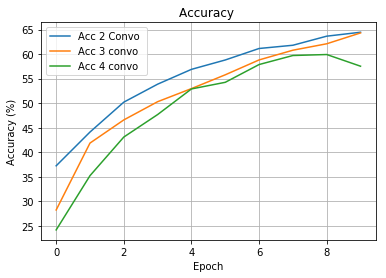

In [127]:
# Question 6

# augmentation du nombre de couches de convolutions
# et affichage des données.

# entrainement sur 10 epoch 

figure = plt.figure(1)
figure2 = plt.figure(2)

epoch = [x for x in range(10)]
handles = []
handles2 = []

plt.plot(epoch, lstAcc2Conv)
plt.plot(epoch, lstAcc3Conv)
plt.plot(epoch, lstAcc4Conv)


handles.append("Acc 2 Convo ")
handles.append("Acc 3 convo " )
handles.append("Acc 4 convo " )

handles2.append("Loss 2 convo ")
handles2.append("Loss 3 convo ")
handles2.append("Loss 4 convo ")


plt.title('Accuracy ')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend(handles)
figure.show()




C:\Users\Nadir\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


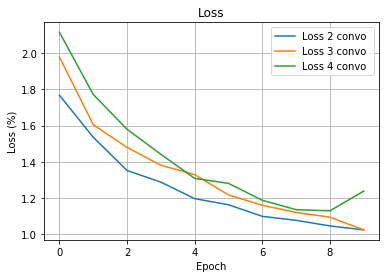

In [126]:
plt.plot(epoch, lstLoss2Conv) 
plt.plot(epoch, lstLoss3Conv )
plt.plot(epoch, lstLoss4Conv)


plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (%)')
plt.grid(True)
plt.legend(handles2)
figure2.show()

In [ ]:
# Question 7 
# 
# Premièrement, j'ai décidé d'augmenter la taille de l'image et de faire plus de convolution sans aucun padding pour compenser.  
# Comme je n'ai pas assez de ressource chez moi pour faire une plus grande augmentation de la taille de l'image, 
# je n'ai qu'augmenter l'image a 64 x 64 et je n'ai que fait 4 convolutions au lieu de 3. 
# 
# ceci dit, je remarque que sur 10 epoch 4 convolutions semble augmenter sensiblement le taux de Loss pour la détection de 
# l'image, comme on peut le voir sur le graphique du, à 4 convolutions, la pente est relativement constante au début, mais
# vers la fin elle remonte. On peut observer l'effet contraire avec seulement 2 convolutions. 
# 